In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

!wget https://www.cs.cmu.edu/~deva/pics/messi5.jpg
!wget https://www.cs.cmu.edu/~deva/pics/gates.jpg

--2024-01-24 04:06:50--  https://www.cs.cmu.edu/~deva/pics/messi5.jpg
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26499 (26K) [image/jpeg]
Saving to: ‘messi5.jpg’

messi5.jpg          100%[===================>]  25.88K   128KB/s    in 0.2s    

2024-01-24 04:06:52 (128 KB/s) - ‘messi5.jpg’ saved [26499/26499]

--2024-01-24 04:06:52--  https://www.cs.cmu.edu/~deva/pics/gates.jpg
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222529 (217K) [image/jpeg]
Saving to: ‘gates.jpg’

gates.jpg           100%[===================>] 217.31K   153KB/s    in 1.4s    

2024-01-24 04:06:54 (153 KB/s) - ‘gates.jpg’ saved [222529/222529]



(numpy.ndarray, (280, 450))

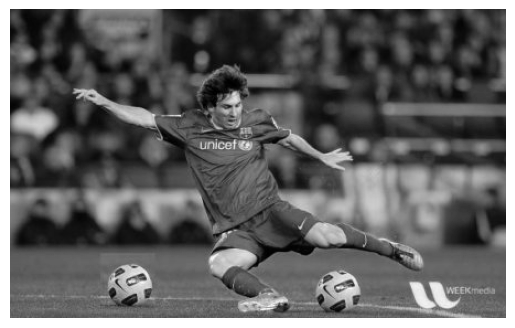

In [2]:
im = plt.imread('messi5.jpg')
im = np.mean(im,2);
plt.figure; plt.imshow(im, cmap = 'gray'); plt.axis('off');
type(im), np.shape(im)

<class 'numpy.ndarray'> (280, 450) (10095478.666666668+0j)


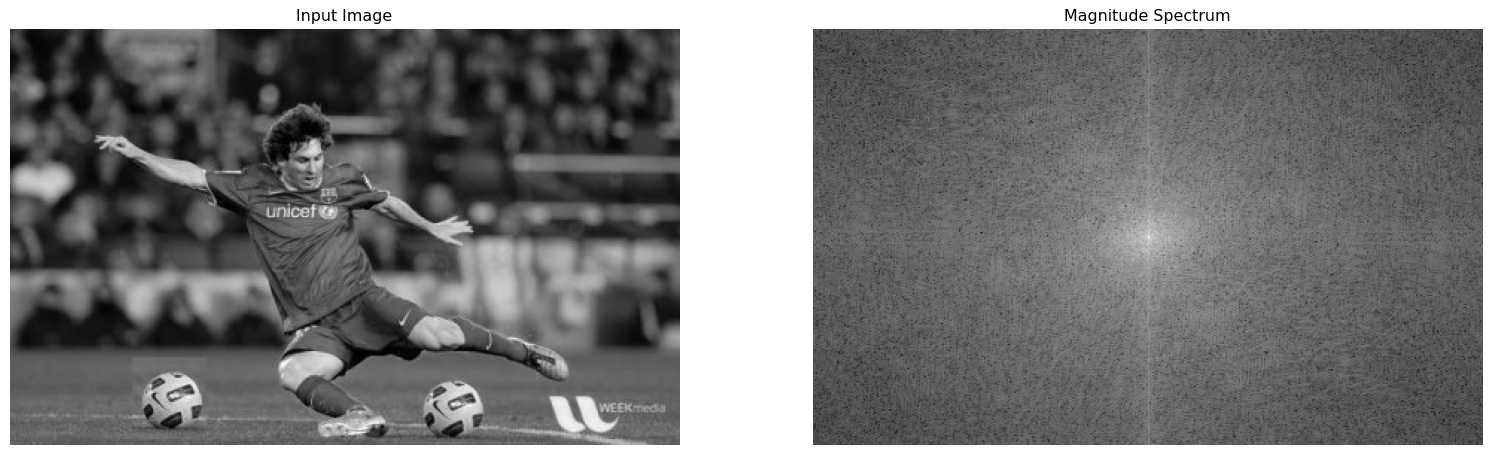

In [3]:
f = np.fft.fft2(im)
print(type(f),np.shape(f), f[0,0])
plt.figure(figsize=(20,20), dpi=95)
plt.subplot(121),plt.imshow(im, cmap = 'gray')
plt.title('Input Image'); plt.axis('off');
plt.subplot(122); plt.imshow(20*np.log(np.abs(np.fft.fftshift(f))), cmap = 'gray')
plt.title('Magnitude Spectrum'); plt.axis('off');

(280, 450)

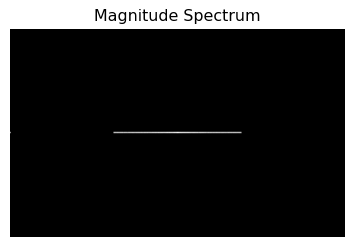

In [4]:
g = np.fft.fftshift(f)
# g[:,220:230] = 1e-5; #Zero out horizontal lines
# k = 50;  # Barely-a-low-pass filter
# k = 130; # Nice low-pass filter
k = 139;  # Reconstruct image with only vertical lines
g[1:k,:] = 1e-5; g[-k:,:] = 1e-5; g[:,1:k] = 1e-5; g[:,-k:] = 1e-5; # Low pass filter
im_rec = np.real(np.fft.ifft2(np.fft.ifftshift(g)))
plt.figure(figsize=(10,10), dpi=95)
plt.subplot(121),plt.imshow(20*np.log(np.abs(g)), cmap = 'gray')
plt.title('Magnitude Spectrum'); plt.axis('off')
np.shape(g)

(Text(0.5, 1.0, 'Reconstructed Image'), (-0.5, 449.5, 279.5, -0.5))

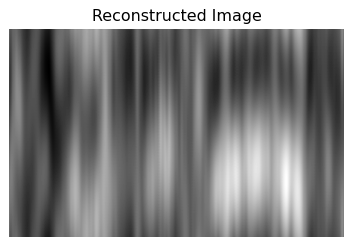

In [5]:
plt.figure(figsize=(10,10), dpi=95)
plt.subplot(122),plt.imshow(im_rec, cmap = 'gray')
plt.title('Reconstructed Image'), plt.axis('off')

((280, 450), (280, 450))

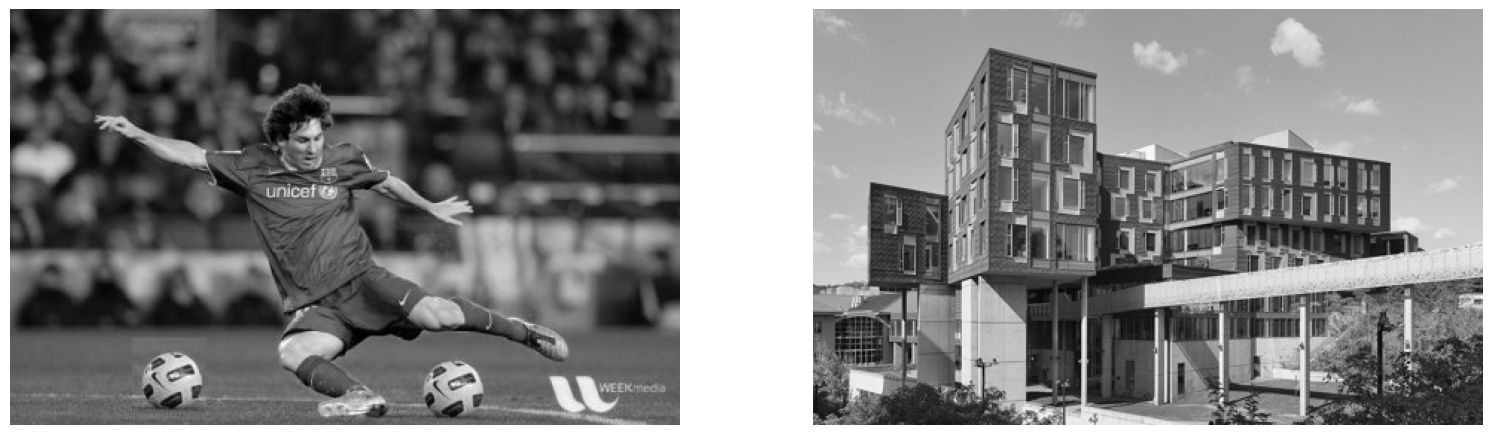

In [6]:
# Load in another image and resize
im2 = plt.imread('gates.jpg')
im2 = np.mean(im2,2)
im2 = Image.fromarray(im2)
im2 = np.array(im2.resize(size=(im.shape[1],im.shape[0])))
plt.figure(figsize=(20,20), dpi=95)
plt.subplot(121); plt.imshow(im, cmap = 'gray'); plt.axis('off');
plt.subplot(122); plt.imshow(im2,cmap = 'gray'); plt.axis('off');
im.shape,im2.shape

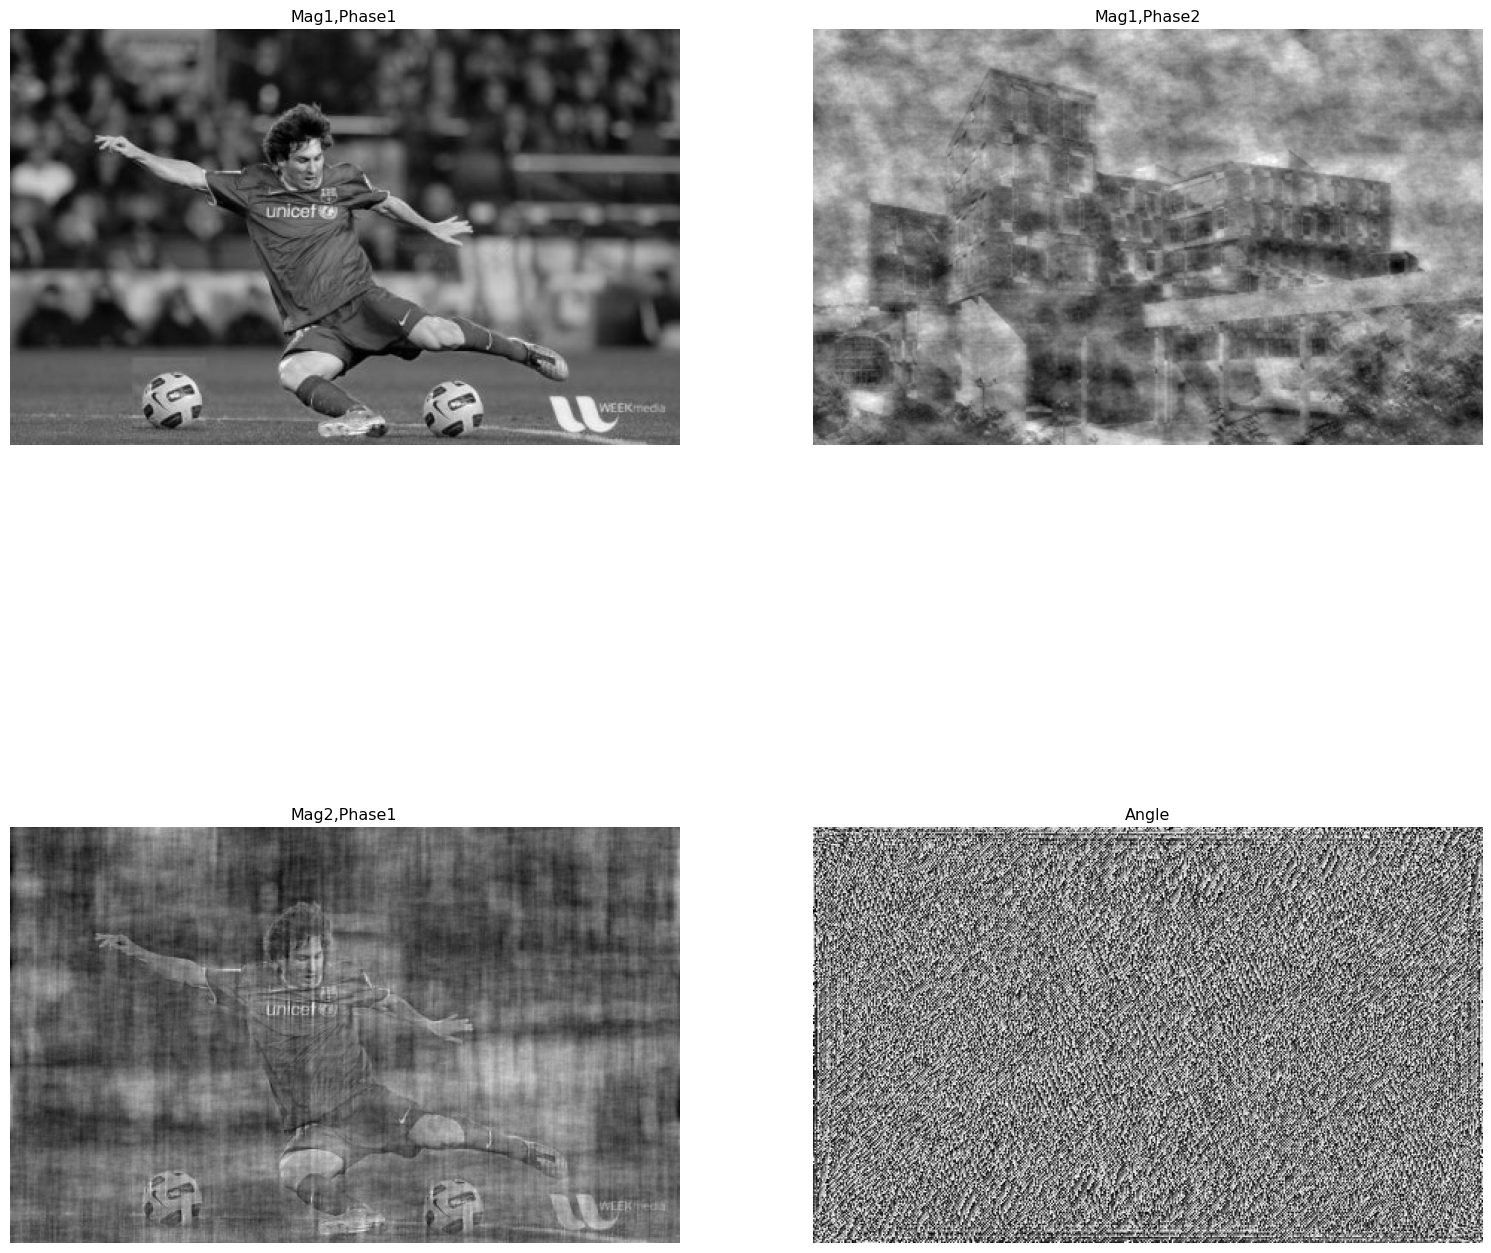

In [7]:
# Swap magnitude and phase of two images
f1 = np.fft.fft2(im);  abs1 = np.abs(f1); ang1 = np.angle(f1);
f2 = np.fft.fft2(im2); abs2 = np.abs(f2); ang2 = np.angle(f2);
rec11 = np.multiply(abs1,np.exp(1j*ang1))
rec12 = np.multiply(abs1,np.exp(1j*ang2))
rec21 = np.multiply(abs2,np.exp(1j*ang1))
rec22 = np.multiply(abs2,np.exp(1j*ang2))
plt.figure(figsize=(20,20), dpi=95)
plt.subplot(221); plt.imshow(np.real(np.fft.ifft2(rec11)), cmap = 'gray'); plt.title('Mag1,Phase1');plt.axis('off');
plt.subplot(222); plt.imshow(np.real(np.fft.ifft2(rec12)), cmap = 'gray'); plt.title('Mag1,Phase2');plt.axis('off');
plt.subplot(223); plt.imshow(np.real(np.fft.ifft2(rec21)), cmap = 'gray'); plt.title('Mag2,Phase1');plt.axis('off');
plt.subplot(224); plt.imshow(np.real(np.fft.ifft2(rec22)), cmap = 'gray'); plt.title('Mag2,Phase2');plt.axis('off');
plt.subplot(224); plt.imshow(ang1, cmap = 'gray'); plt.title('Angle');plt.axis('off');


397.14795918367344

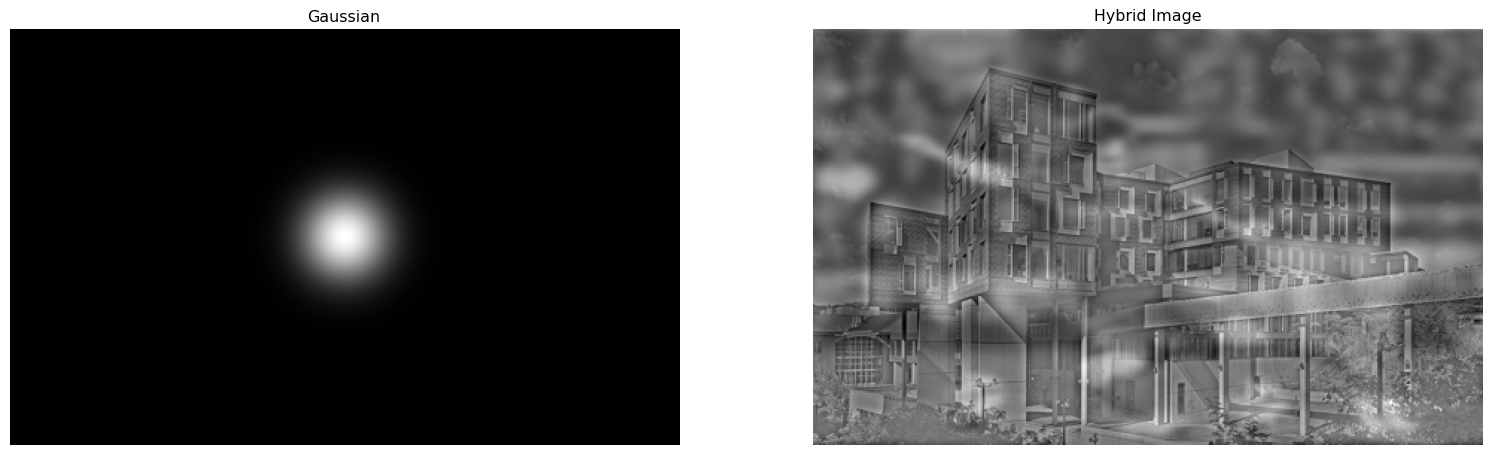

In [14]:
# Hybrid image
(m,n) = [(i - 1)/2 for i in np.shape(im)]
var = np.square(min(m,n)/7)
x,y = np.ogrid[-m:m+1,-n:n+1]
g   = np.exp( -(x*x + y*y) / (2*var) )
plt.figure(figsize=(20,20), dpi=95)
plt.subplot(121);plt.imshow(g, cmap = 'gray');
plt.title('Gaussian'); plt.axis('off')
mask = np.fft.ifftshift(g);
f    = np.multiply(f1,mask) + np.multiply(f2,1-mask)
im_rec = np.real(np.fft.ifft2(f))
plt.subplot(122);plt.imshow(im_rec, cmap = 'gray')
plt.title('Hybrid Image'); plt.axis('off')